In [1]:
using BoundaryValueDiffEq, ForwardDiff

In [2]:
using DifferentialEquations
using OrdinaryDiffEq

In [3]:
using OrdinaryDiffEq

In [4]:
using Plots

In [5]:
potential(x) = x^4/4 - x^2/2;
#potential(x) = x^4-6*x^2-2*x+5;

In [6]:
#dev_potential(x) = 4*x^3 - 12*x - 2

In [7]:
#sec_potential(x) = 12*x^3 - 12

In [8]:
phi_const(k) = cosh(k) - 1

phi_const (generic function with 1 method)

In [9]:
#phi_deriv(k) = sinh(k)

In [10]:
x1 = -1.0
x2 = 0;
guess = 0.2;

In [11]:
#function euler_lagrange!(du, u, p, t)
#    du[1] = -dev_potential(u[1]) + u[2] + phi_deriv(u[2])
#    du[2] =  sec_potential(u[1])*u[2]
#end

In [12]:
function euler_lagrange!(du, u, p, t)
    du[1] = -ForwardDiff.derivative(potential, u[1]) + u[2] + a *ForwardDiff.derivative(phi_const, u[2])
    du[2] = ForwardDiff.derivative(x -> ForwardDiff.derivative(potential, x), u[1])*u[2]
end

function euler_l!(du, u, p, t)
    du[1] = -ForwardDiff.derivative(potential, u[1]) + u[2]
    du[2] = ForwardDiff.derivative(x -> ForwardDiff.derivative(potential, x), u[1])*u[2]
end

euler_l! (generic function with 1 method)

In [13]:
function bc2!(residual, u, p, t) # u[1] is the beginning of the time span, and u[end] is the ending
    residual[1] = u[1][1] - x1 # the solution at the beginning of the time span should be -pi/2
    residual[2] = u[end][1] - x2 # the solution at the end of the time span should be pi/2
end

bc2! (generic function with 1 method)

In [14]:
tspan = (0.0, 10.0)

(0.0, 10.0)

In [15]:
u0 = [x1, guess] # the initial guess

2-element Vector{Float64}:
 -1.0
  0.2

In [16]:
bvp3 = BVProblem(euler_lagrange!, bc2!, u0, tspan)



BVProblem with uType Vector{Float64} and tType Float64. In-place: true
timespan: (0.0, 10.0)
u0: 2-element Vector{Float64}:
 -1.0
  0.2

In [17]:
sol3 = solve(bvp3, Shooting(Vern7()))


LoadError: UndefVarError: a not defined

Some of the types have been truncated in the stacktrace for improved reading. To emit complete information
in the stack trace, evaluate `TruncatedStacktraces.VERBOSE[] = true` and re-run the code.


In [ ]:
u0 = [x1, guess]
bvp4 = BVProblem(euler_l!, bc2!, u0, tspan)
sol4 = solve(bvp4, Shooting(Vern7()))

┌ Warning: dt(1.7763568394002505e-15) <= dtmin(1.7763568394002505e-15) at t=7.726551004655361. Aborting. There is either an error in your model specification or the true solution is unstable.
└ @ SciMLBase /home/vetkje/.julia/packages/SciMLBase/DLiTf/src/integrator_interface.jl:529
┌ Warning: dt(1.7763568394002505e-15) <= dtmin(1.7763568394002505e-15) at t=7.72674952356676. Aborting. There is either an error in your model specification or the true solution is unstable.
└ @ SciMLBase /home/vetkje/.julia/packages/SciMLBase/DLiTf/src/integrator_interface.jl:529
┌ Warning: dt(1.7763568394002505e-15) <= dtmin(1.7763568394002505e-15) at t=7.7263525050631285. Aborting. There is either an error in your model specification or the true solution is unstable.
└ @ SciMLBase /home/vetkje/.julia/packages/SciMLBase/DLiTf/src/integrator_interface.jl:529
┌ Warning: dt(1.7763568394002505e-15) <= dtmin(1.7763568394002505e-15) at t=7.726436629848062. Aborting. There is either an error in your model specifi

retcode: Success
Interpolation: specialized 7th order lazy interpolation
t: 16-element Vector{Float64}:
  0.0
  0.1715273240274166
  0.48368460993059514
  0.8632439164328574
  1.2964906750310587
  1.8033380429397856
  2.4343276350896823
  3.007790358939664
  3.6099398216350744
  4.219744708130058
  5.070957152586508
  5.731464653001505
  6.621527637507732
  7.560322705898352
  8.845751854462817
 10.0
u: 16-element Vector{Vector{Float64}}:
 [-1.0, 0.004399111658259602]
 [-0.9992305700147309, 0.006196999777184935]
 [-0.9975263247739057, 0.011535619223104242]
 [-0.9940399375205002, 0.024420011092004375]
 [-0.9856115589385088, 0.056659107833475233]
 [-0.9615865865104261, 0.14504688568870294]
 [-0.8810876059928241, 0.39422170024359393]
 [-0.7240776196143117, 0.6889303715155741]
 [-0.4984043178957965, 0.7492048876675677]
 [-0.2982097060775519, 0.5433945141051024]
 [-0.13219250661462106, 0.25977928540067763]
 [-0.06872079671802238, 0.1368197476672094]
 [-0.028246903209482314, 0.05651460156853

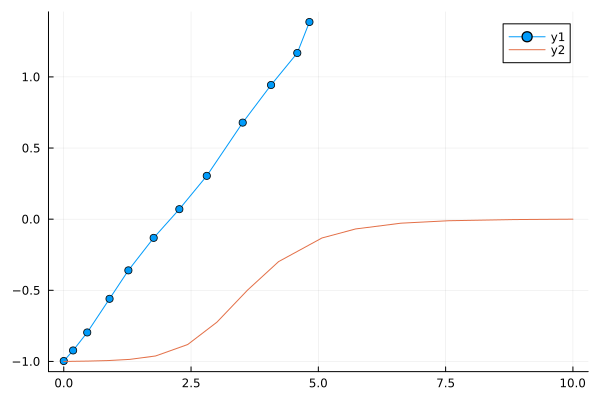

In [ ]:
plot(sol3.t, map(x-> x[1], sol3.u), marker = :circle)
plot!(sol4.t, map(x-> x[1], sol4.u))

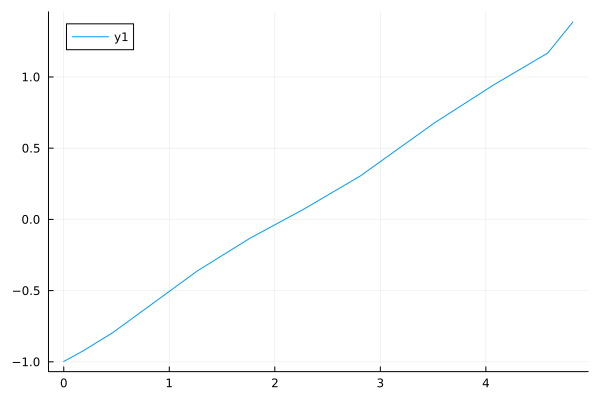

In [108]:
#plot(sol2.t, map(x-> x[1], sol2.u))
plot(sol3.t, map(x-> x[1], sol3.u))